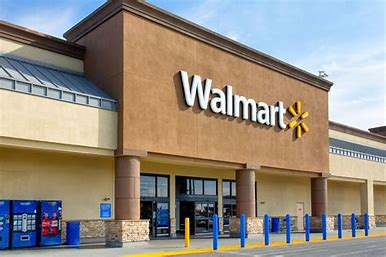

# ***EDA***

In [1]:
# importing the libraries
!pip install numpy==1.26.4
!pip install --upgrade pmdarima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
# checking for null values,duplicate values and outliers

In [4]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


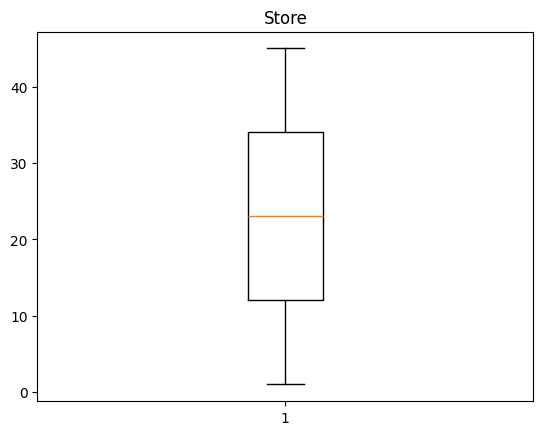

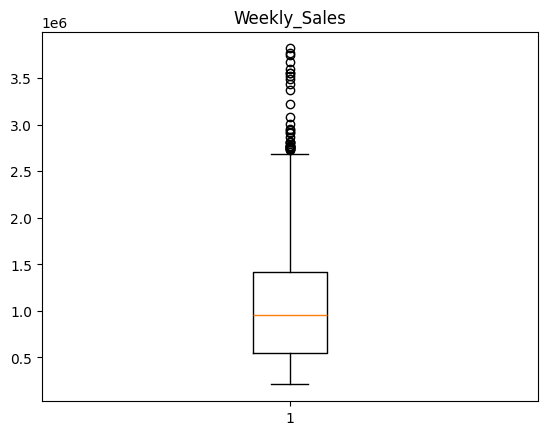

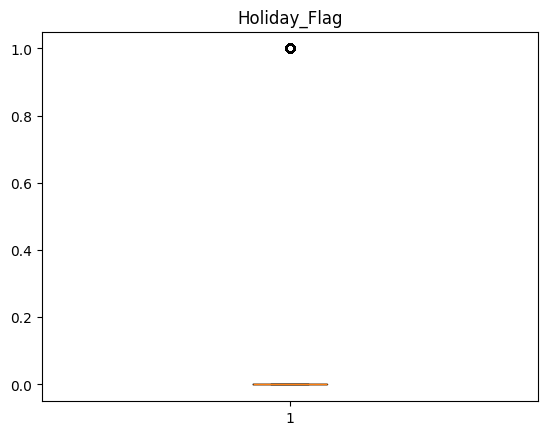

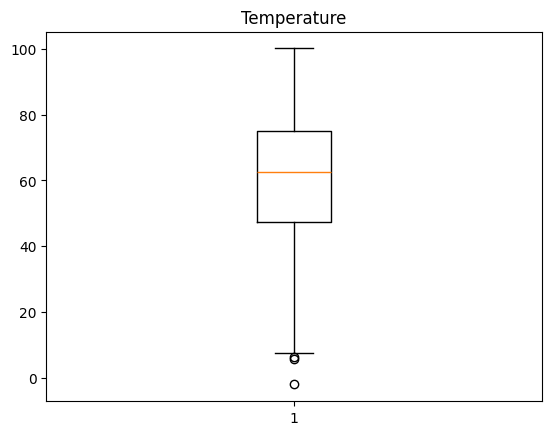

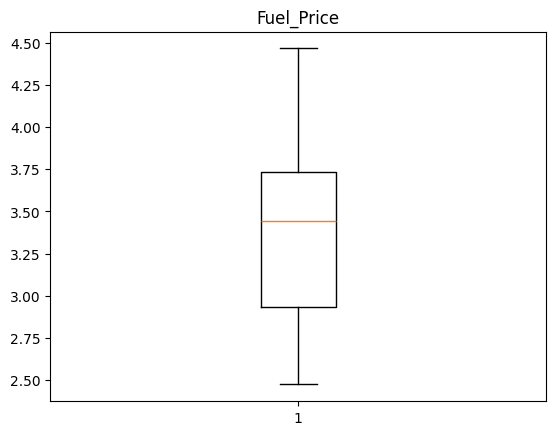

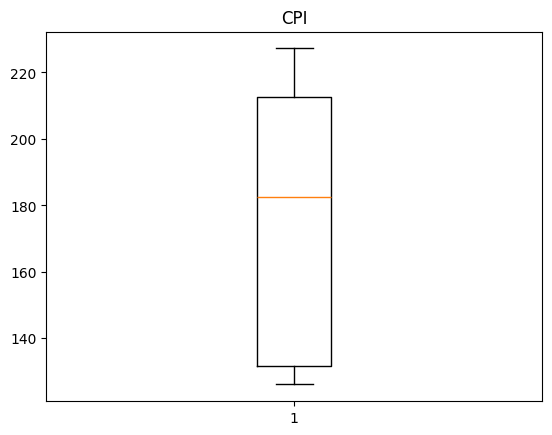

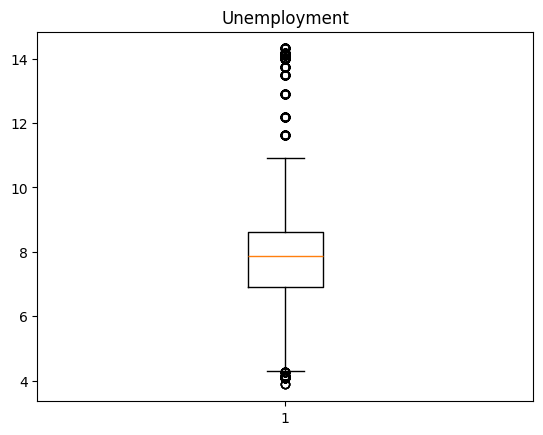

In [7]:
for x in df.columns:
  if df[x].dtype !='object':
    plt.boxplot(df[x])
    plt.title(x)
    plt.show()

In [8]:
# we are not going to omit the outliers because it is a big part of the dataset

# ***a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?***

In [9]:
df_corr=df.drop('Date',axis=1)
df_corr

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,718125.53,0,56.47,3.969,192.330854,8.667


<Axes: >

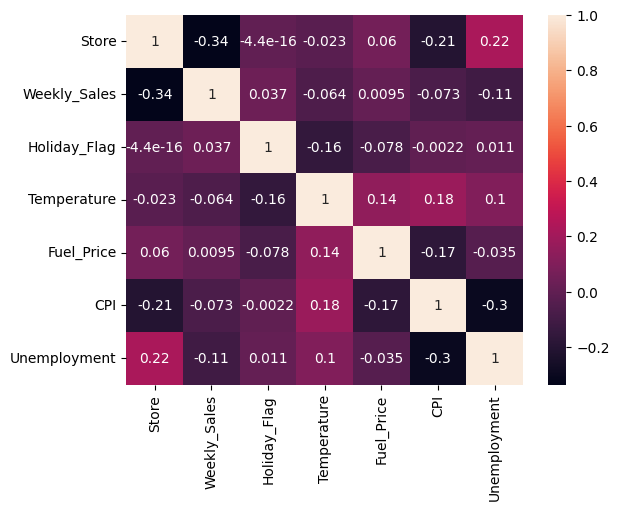

In [10]:
sns.heatmap(df_corr.corr(),annot=True)

There is a weak negative correlation between Unemployment and Weekly Sales

In [11]:
unemp_weekly=df.groupby('Store')[['Unemployment','Weekly_Sales']].sum()
unemp_weekly

,Unemployment,Weekly_Sales
Store,,
1,1088.290,2.224028e+08
2,1090.210,2.753824e+08
3,1026.309,5.758674e+07
4,852.951,2.995440e+08
5,900.243,4.547569e+07
6,944.787,2.237561e+08
7,1227.760,8.159828e+07
8,871.134,1.299512e+08
9,872.283,7.778922e+07


In [12]:
unemp_weekly.sort_values(by='Unemployment',ascending=False).head(10)

,Unemployment,Weekly_Sales
Store,,
12,1875.657,1.442872e+08
38,1875.657,5.515963e+07
28,1875.657,1.892637e+08
43,1420.677,9.056544e+07
34,1420.677,1.382498e+08
29,1402.313,7.714155e+07
18,1263.877,1.551147e+08
35,1256.766,1.315207e+08
14,1236.771,2.889999e+08


From the table we can conclude that the Stores mentioned above are ***slighty suffering*** from Unemployment since there is not strong correlation between unemployment and weekly sales

We also have **Store 14** which is one of the **top 10** Stores with the highest weekly sales , which proves our previous point that there is no strong correlation

# ***b. If the weekly sales show a seasonal trend, when and what could be the reason?***

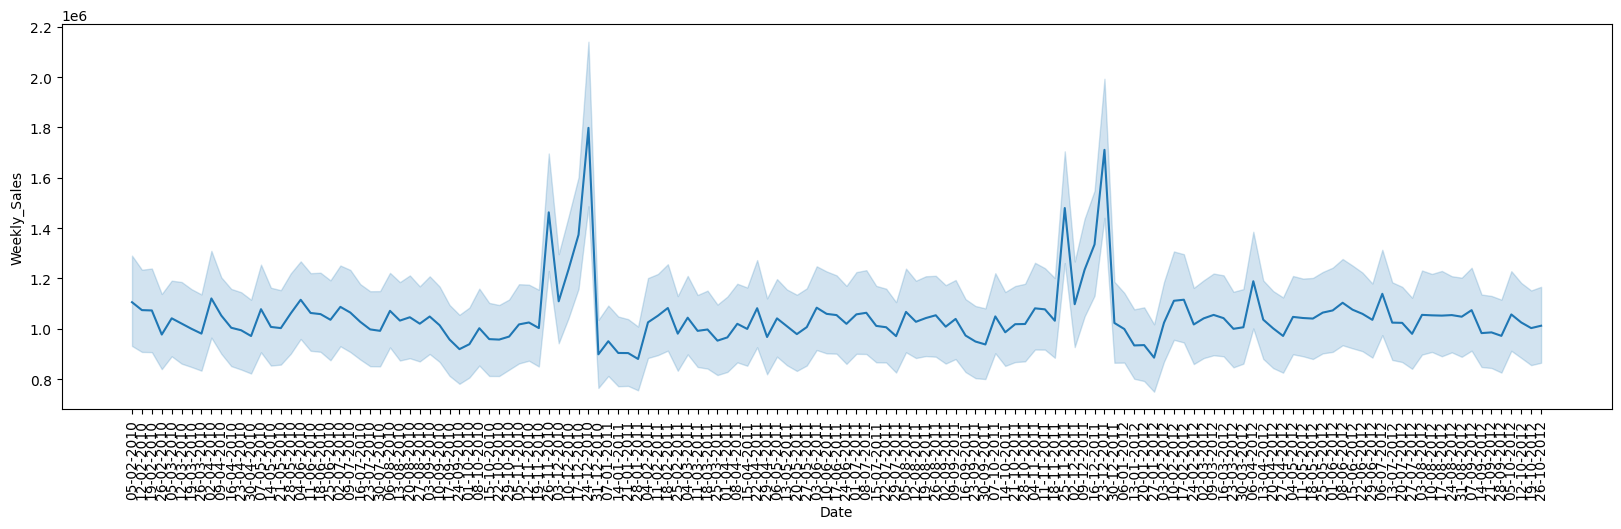

In [13]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df,x='Date',y='Weekly_Sales')
plt.xticks(rotation=90)
plt.show()

In [14]:
df['Date']=pd.to_datetime(df['Date'],format='mixed')
df.info()
# converting object data type to datetime to better visualize the trends

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [15]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


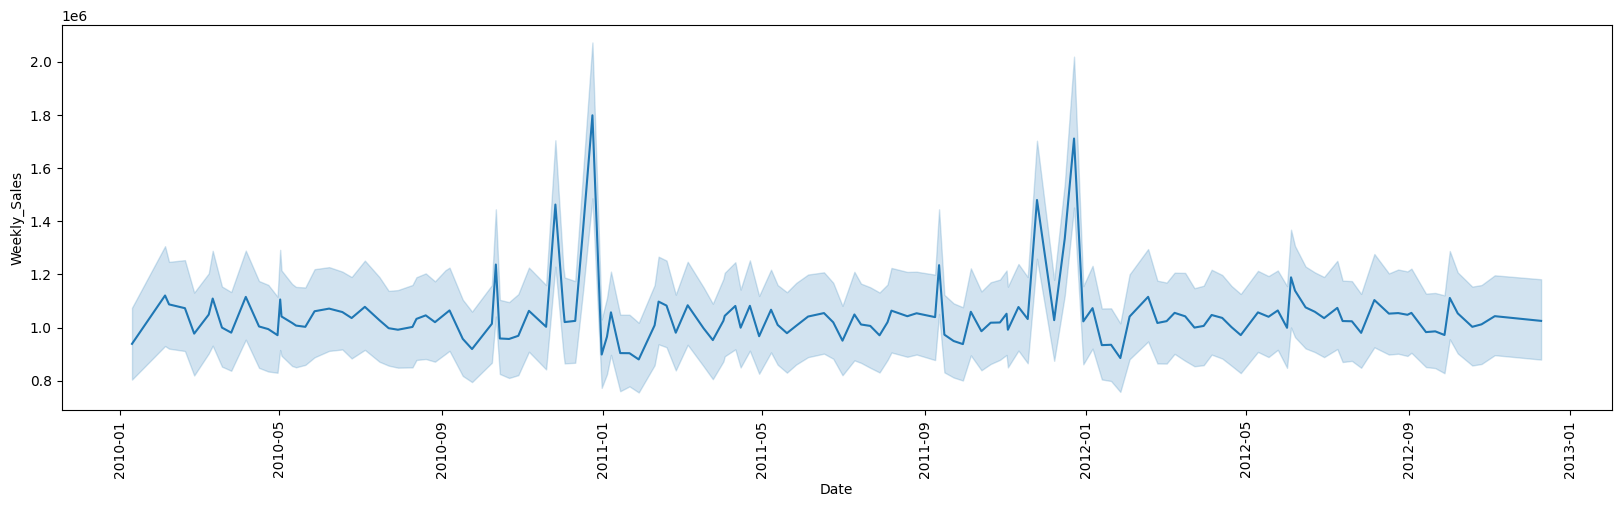

In [16]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df,x='Date',y='Weekly_Sales')
plt.xticks(rotation=90)
plt.show()

From the above visualization we can clearly see that weekly sales shows a Seasonal trend :

Seasonal trends exist in data when external factors—such as climate, holidays, or business cycles—cause recurring changes in patterns over specific timeframes

Seasonal trends exist in the data in the month of November and December of every year this is because of holidays like **Black Friday** and **Christmas**

# ***c. Does temperature affect the weekly sales in any manner?***

<Axes: >

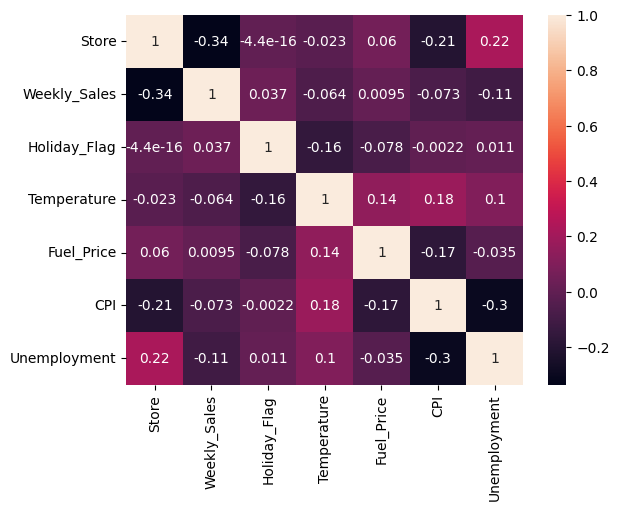

In [17]:
sns.heatmap(df_corr.corr(),annot=True)

In [18]:
df.sort_values(by='Temperature',ascending=False).head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4599,33,2010-07-16,280937.84,0,100.14,2.971,126.149806,9.495
4707,33,2012-10-08,297753.49,0,100.07,3.811,130.756161,7.147
4657,33,2011-08-26,237095.82,0,99.66,3.663,129.283258,8.442
1597,12,2010-07-23,912403.67,0,99.22,3.112,126.128355,14.180
3885,28,2010-07-23,1205884.98,0,99.22,3.112,126.128355,14.180
5315,38,2010-07-23,328336.85,0,99.22,3.112,126.128355,14.180
4658,33,2011-02-09,239198.36,0,99.20,3.798,129.325936,8.442
4649,33,2011-01-07,226702.36,0,98.43,3.842,129.089400,8.442
4701,33,2012-06-29,244338.31,0,98.15,3.875,130.756267,7.396
4597,33,2010-02-07,267495.76,0,97.66,2.978,126.139200,9.495


In [19]:
df.sort_values(by='Weekly_Sales',ascending=False).head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795
1814,13,2011-12-23,3556766.03,0,24.76,3.186,129.984548,6.392
2815,20,2011-12-23,3555371.03,0,40.19,3.389,212.236040,7.082
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127
1385,10,2011-12-23,3487986.89,0,48.36,3.541,129.984548,7.874
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163


From the above tables we can conclude that there is a **weak negative correlation** between Weekly Sales and Temperature

Which means Stores having high temperatures are less likely to have high weekly sales.

# ***d. How is the Consumer Price index affecting the weekly sales of various stores?***

In [20]:
cpi_weekly=df.groupby('Store')[['CPI','Weekly_Sales']].sum()
cpi_weekly

,CPI,Weekly_Sales
Store,,
1,30887.555523,2.224028e+08
2,30837.422420,2.753824e+08
3,31372.988971,5.758674e+07
4,18401.192733,2.995440e+08
5,30968.878137,4.547569e+07
6,31110.107182,2.237561e+08
7,27693.986741,8.159828e+07
8,31379.780750,1.299512e+08
9,31406.616557,7.778922e+07


<Axes: >

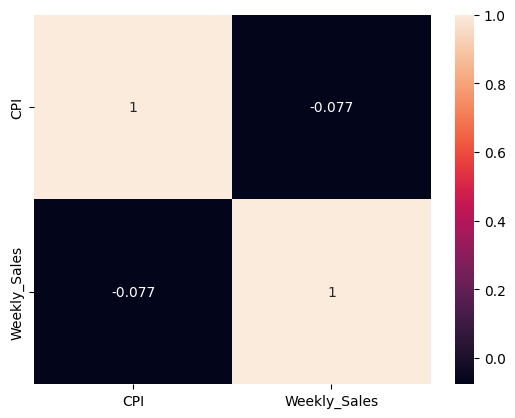

In [21]:
sns.heatmap(cpi_weekly.corr(),annot=True)

In [22]:
cpi_weekly.sort_values(by='Weekly_Sales',ascending=False).head(10)

,CPI,Weekly_Sales
Store,,
20,29892.452680,3.013978e+08
4,18401.192733,2.995440e+08
14,26638.851959,2.889999e+08
13,18401.192733,2.865177e+08
2,30837.422420,2.753824e+08
10,18401.192733,2.716177e+08
27,19878.613542,2.538559e+08
6,31110.107182,2.237561e+08
1,30887.555523,2.224028e+08


In [23]:
cpi_weekly.sort_values(by='CPI',ascending=False).head(10)

,CPI,Weekly_Sales
Store,,
9,31406.616557,7.778922e+07
8,31379.780750,1.299512e+08
11,31372.988971,1.939628e+08
3,31372.988971,5.758674e+07
6,31110.107182,2.237561e+08
5,30968.878137,4.547569e+07
1,30887.555523,2.224028e+08
2,30837.422420,2.753824e+08
21,30837.422420,1.081179e+08


From the above tables we can conclude that there is a ***weak negative correlation*** between CPI and Weekly Sales

Since the correlation is weak we can see that ***stores 1,2,6*** have ranked high in both CPI and Weekly Sales

# ***e. Top performing stores according to the historical data.***

In [24]:
sales_df=df.groupby('Store')['Weekly_Sales'].sum()
sales_df

,Weekly_Sales
Store,
1,2.224028e+08
2,2.753824e+08
3,5.758674e+07
4,2.995440e+08
5,4.547569e+07
6,2.237561e+08
7,8.159828e+07
8,1.299512e+08
9,7.778922e+07


In [25]:
top_10=sales_df.sort_values(ascending=False).head(10)
top_10 = top_10.to_frame().reset_index()
top_10.set_index('Store',inplace=True)
top_10

,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08
10,2.716177e+08
27,2.538559e+08
6,2.237561e+08
1,2.224028e+08


# ***f.The worst performing store, and how significant is the difference between the highest and lowest performing stores.***

In [26]:
worst_10=sales_df.sort_values(ascending=True).head(10)
worst_10 = worst_10.to_frame().reset_index()
worst_10.set_index('Store',inplace=True)
worst_10

,Weekly_Sales
Store,
33,37160221.96
44,43293087.84
5,45475688.90
36,53412214.97
38,55159626.42
3,57586735.07
30,62716885.12
37,74202740.32
16,74252425.40


In [27]:
difference=top_10['Weekly_Sales'].sum()-worst_10['Weekly_Sales'].sum()
difference

np.float64(2050518734.3799996)

# ***Selecting Stores***

***2.Use predictive modeling techniques to forecast the sales for any 5 stores for the next 12 weeks.***

In [28]:
!pip install pmdarima
import itertools
from sklearn.metrics import *
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


For model building we are going to select the following ***Stores 5,33,44*** from the worst performing stores and ***Stores 4,20*** from the best prforming stores.

In [29]:
store5=df[df['Store']==5]
store5.drop(columns=['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'],inplace=True)
store5.set_index('Date',inplace=True)
store5.head(5)

<ipython-input-29-e2c23483cf02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store5.drop(columns=['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'],inplace=True)


,Weekly_Sales
Date,
2010-05-02,317173.10
2010-12-02,311825.70
2010-02-19,303447.57
2010-02-26,270281.63
2010-05-03,288855.71


In [30]:
store33=df[df['Store']==33]
store33.drop(columns=['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'],inplace=True)
store33.set_index('Date',inplace=True)
store33.head(5)

<ipython-input-30-2bdb0f3935da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store33.drop(columns=['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'],inplace=True)


,Weekly_Sales
Date,
2010-05-02,274593.43
2010-12-02,294882.83
2010-02-19,296850.83
2010-02-26,284052.77
2010-05-03,291484.89


In [31]:
store44=df[df['Store']==44]
store44.drop(columns=['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'],inplace=True)
store44.set_index('Date',inplace=True)
store44.head(5)

<ipython-input-31-8d6f811cc18d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store44.drop(columns=['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'],inplace=True)


,Weekly_Sales
Date,
2010-05-02,281090.95
2010-12-02,286857.13
2010-02-19,267956.30
2010-02-26,273079.07
2010-05-03,284617.27


In [32]:
store4=df[df['Store']==4]
store4.drop(columns=['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'],inplace=True)
store4.set_index('Date',inplace=True)
store4.head(5)

<ipython-input-32-9f09f7e4267b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store4.drop(columns=['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'],inplace=True)


,Weekly_Sales
Date,
2010-05-02,2135143.87
2010-12-02,2188307.39
2010-02-19,2049860.26
2010-02-26,1925728.84
2010-05-03,1971057.44


In [33]:
store20=df[df['Store']==20]
store20.drop(columns=['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'],inplace=True)
store20.set_index('Date',inplace=True)
store20.head(5)

<ipython-input-33-9ee8fbd8b188>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store20.drop(columns=['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'],inplace=True)


,Weekly_Sales
Date,
2010-05-02,2401395.47
2010-12-02,2109107.90
2010-02-19,2161549.76
2010-02-26,1898193.95
2010-05-03,2119213.72


# ***LOG transformation for better model building***

In [34]:
store5_log=np.log(store5)
store5_log.head(5)

,Weekly_Sales
Date,
2010-05-02,12.667203
2010-12-02,12.650200
2010-02-19,12.622964
2010-02-26,12.507220
2010-05-03,12.573683


In [35]:
store33_log=np.log(store33)
store33_log.head(5)

,Weekly_Sales
Date,
2010-05-02,12.523047
2010-12-02,12.594333
2010-02-19,12.600985
2010-02-26,12.556915
2010-05-03,12.582743


In [36]:
store44_log=np.log(store44)
store44_log.head(5)

,Weekly_Sales
Date,
2010-05-02,12.546434
2010-12-02,12.566740
2010-02-19,12.498579
2010-02-26,12.517517
2010-05-03,12.558901


In [37]:
store4_log=np.log(store4)
store4_log.head(5)

,Weekly_Sales
Date,
2010-05-02,14.574045
2010-12-02,14.598639
2010-02-19,14.533282
2010-02-26,14.470815
2010-05-03,14.494081


In [38]:
store20_log=np.log(store20)
store20_log.head(5)

,Weekly_Sales
Date,
2010-05-02,14.691561
2010-12-02,14.561776
2010-02-19,14.586336
2010-02-26,14.456413
2010-05-03,14.566556


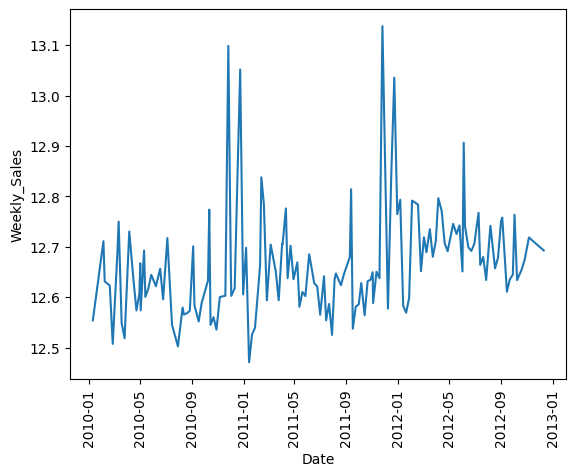

In [39]:
sns.lineplot(data=store5_log,x=store5_log.index,y='Weekly_Sales')
plt.xticks(rotation=90)
plt.show()


* **There is huge chance, that the data might be un-stationary, by simply visualizing, since we can observe that the mean and the variance are not constant**

# **Check for stationarity**

 **We need to ensure that the mean and the variance is constant**

In [40]:
rolling_mean = store5_log.rolling(window = 12).mean()
rolling_std = store5_log.rolling(window = 12).std()

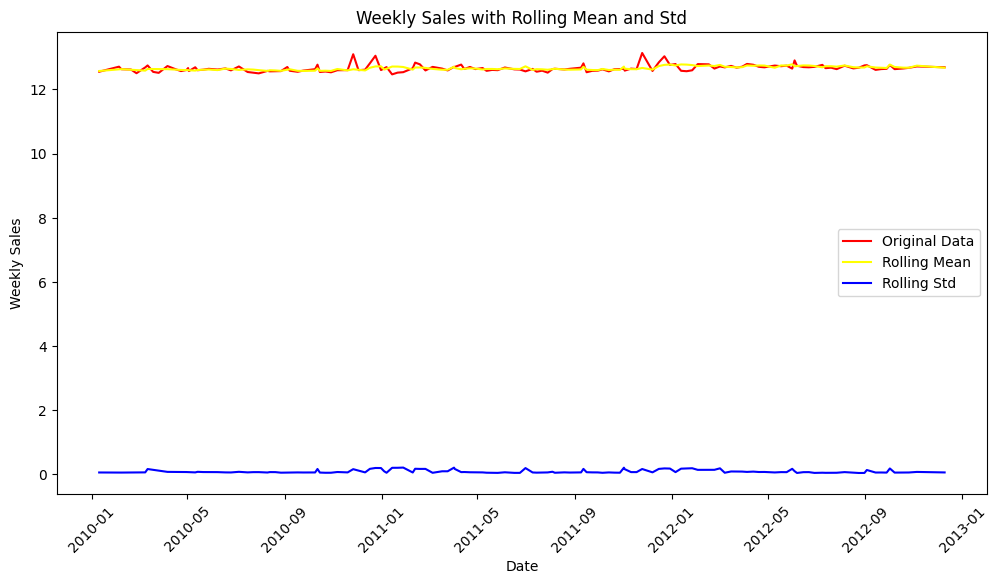

In [41]:
plt.figure(figsize=(12, 6))
original_data = sns.lineplot(x=store5_log.index, y='Weekly_Sales', data=store5_log, color="red", label="Original Data")
mean_data = sns.lineplot(x=rolling_mean.index, y='Weekly_Sales', data=rolling_mean, color="yellow", label="Rolling Mean")
std_data = sns.lineplot(x=rolling_std.index, y='Weekly_Sales', data=rolling_std, color="blue", label="Rolling Std")

plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("Weekly Sales with Rolling Mean and Std")
plt.xticks(rotation=45)
plt.legend()
plt.show()

**The mean is fairly stable with respect to time, variance is also stable**

### **ADFuller - Augmented Dickey Fuller Test**
  * **This is a tool for checking stationarity statistically**
  * **What's the condition of stationarity**
    * **If the p-value is low (< 0.05) -> Stationary**
    * **If the p-value is high (> 0.05) -> Non Stationary**

In [42]:
results = adfuller(store5_log['Weekly_Sales'])
print(f"P-value: {results[1]}")

P-value: 0.00030001322730066116


# **Discovering the order of the models**

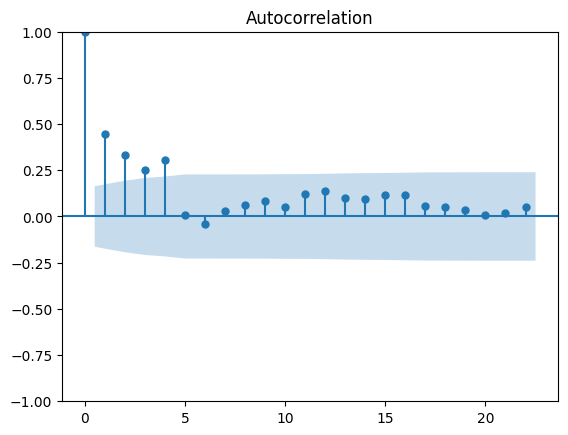

In [44]:
plot_acf(store5_log)
plt.show()

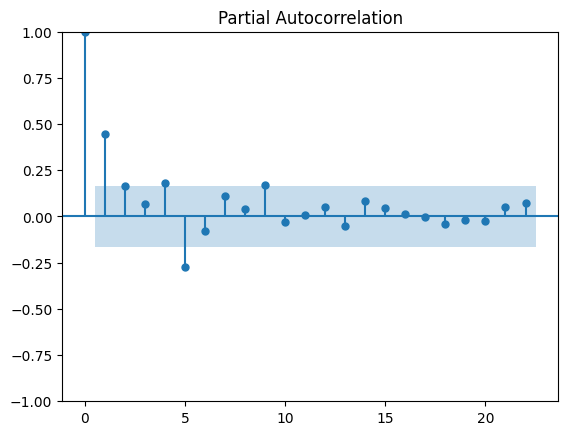

In [45]:
plot_pacf(store5_log)
plt.show()

* **Assume: Model1 = (6, 0, 5)**
* **Assume: Model2 = (4, 0, 5)**

In [46]:
model= ARIMA(store5_log,order=(6,0,5))


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

In [47]:
results_ar=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
errors=sum((results_ar.fittedvalues-store5_log['Weekly_Sales'])**2)
errors

1.0686997295614047

In [49]:
model2 = ARIMA(store5_log, order = (21, 0,21))

results2 = model2.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

In [50]:
errors2=sum((results2.fittedvalues-store5_log['Weekly_Sales'])**2)
errors2

0.9984973593062088

# ***Prediction and Forecasting***

In [51]:
pred=results2.predict(1,end=len(store5_log))
pred.index=store5_log.index
pred=np.exp(pred)
pred

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
Date,
2010-05-02,316376.115611
2010-12-02,314437.362612
2010-02-19,310562.817487
2010-02-26,297281.183178
2010-05-03,297026.486195
...,...
2012-09-28,326894.094631
2012-05-10,308330.455627
2012-12-10,314328.629162


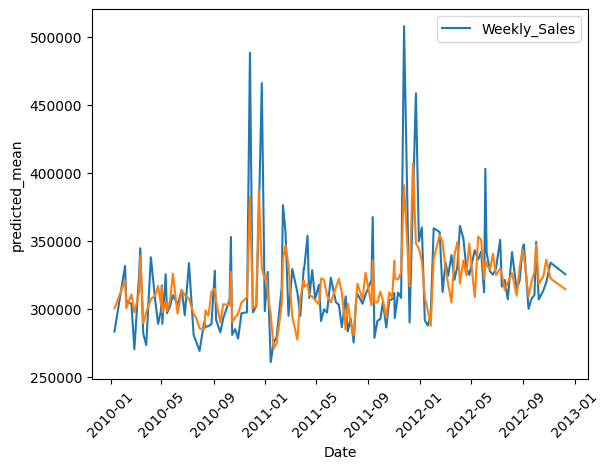

In [52]:
sns.lineplot(store5)
sns.lineplot(pred)
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [53]:
pred2=results2.predict(1,end=len(store5_log)+12)
pred2=np.exp(pred2)
pred2

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
1,316376.115611
2,314437.362612
3,310562.817487
4,297281.183178
5,297026.486195
...,...
151,318384.386547
152,313564.024088
153,322008.570705
154,320028.872487


In [54]:
date_rng = pd.date_range(start='2012-11-02', periods=12, freq='W')
forecast=pred2.iloc[143:]
forecast

,predicted_mean
144,322853.924679
145,308715.023606
146,318964.731817
147,323190.232526
148,319084.230022
149,322280.715717
150,323691.372285
151,318384.386547
152,313564.024088
153,322008.570705


In [55]:
forecast = pd.DataFrame(forecast).reset_index()
forecast = forecast.rename(columns={forecast.columns[0]: 'Date'})
forecast['date'] = date_rng
forecast.drop(columns=['Date'],inplace=True)
forecast.set_index('date',inplace=True)
forecast

,predicted_mean
date,
2012-11-04,322853.924679
2012-11-11,308715.023606
2012-11-18,318964.731817
2012-11-25,323190.232526
2012-12-02,319084.230022
2012-12-09,322280.715717
2012-12-16,323691.372285
2012-12-23,318384.386547
2012-12-30,313564.024088


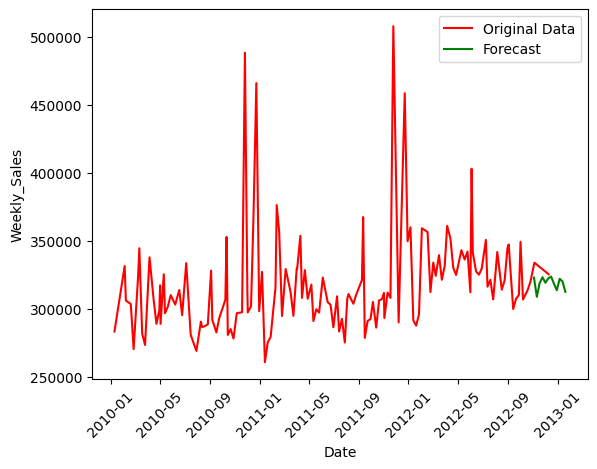

In [56]:
sns.lineplot(data=store5, x=store5.index, y='Weekly_Sales', color="red", label="Original Data")
sns.lineplot(data=forecast, x=forecast.index, y='predicted_mean', color="green", label="Forecast")
plt.legend()
plt.xticks(rotation=45)
plt.show()

Arima cant capture the seasonality of the data therefore we will try sarimax


# ***SARIMAX***

In [57]:
import itertools

In [58]:
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))

In [138]:
seasonal_pdq= [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [139]:
import warnings
warnings.filterwarnings("ignore")

In [140]:
best_aic = float('inf')

best_order = None

best_seasonal_order = None

In [141]:
for x in pdq:
  for y in seasonal_pdq:
    try:
      model_sari = SARIMAX(store5_log,        # data
                      order = x,           # normal order (AR, d, MA) (1, 0, 1)
                      seasonal_order = y)  # seasonal order (AR, d, MA, periodcity) (1, 1, 1, 12)
      results_sari = model_sari.fit()                # Fitting the data into the model

      if results_sari.aic < best_aic:  # we are comparing that if the best aic is greater than the current model's aic
        best_aic = results_sari.aic    # IF yes, we will update the best aic with current model aic
        best_order = x
        best_seasonal_order = y
        print(f"SARIMA{x}x{y} - AIC: {results_sari.aic}")
    except:
      continue


print(f"Best Model: SARIMA{best_order}x{best_seasonal_order}, AIC: {best_aic}")

SARIMA(0, 0, 0)x(0, 0, 0, 52) - AIC: 1133.907595962875
SARIMA(0, 0, 0)x(0, 0, 1, 52) - AIC: 1047.3129949028698
SARIMA(0, 0, 0)x(0, 1, 0, 52) - AIC: -199.48313559947235
SARIMA(0, 0, 1)x(0, 1, 0, 52) - AIC: -224.72021173991803
SARIMA(0, 1, 0)x(0, 0, 1, 52) - AIC: -270.29857760158114
SARIMA(0, 1, 0)x(1, 0, 0, 52) - AIC: -305.94175644896166
SARIMA(0, 1, 0)x(1, 0, 1, 52) - AIC: -313.44692032453776
SARIMA(0, 1, 1)x(1, 0, 0, 52) - AIC: -353.35605120187086
SARIMA(0, 1, 1)x(1, 0, 1, 52) - AIC: -364.60161606275494
SARIMA(1, 1, 1)x(1, 0, 1, 52) - AIC: -366.49363596251237
Best Model: SARIMA(1, 1, 1)x(1, 0, 1, 52), AIC: -366.49363596251237


In [142]:
final_model=SARIMAX(store5_log,order=(22,1,22),seasonal_order=(1, 0, 1, 52))#52 because the data is in weekly format
results_f=final_model.fit()

In [143]:
forecast_s=results_f.forecast(steps=12)
forecast_s=np.exp(forecast_s)
forecast_s

,predicted_mean
143,366698.242654
144,331046.951242
145,332365.313365
146,521671.511631
147,384306.636944
148,380938.846689
149,408342.900738
150,481510.616330
151,357620.485477
152,321099.459209


In [144]:
forecast_s = pd.DataFrame(forecast_s).reset_index()
forecast_s = forecast_s.rename(columns={forecast_s.columns[0]: 'Date'})
forecast_s['date'] = date_rng
forecast_s.drop(columns=['Date'],inplace=True)
forecast_s.set_index('date',inplace=True)
forecast_s

,predicted_mean
date,
2012-11-04,366698.242654
2012-11-11,331046.951242
2012-11-18,332365.313365
2012-11-25,521671.511631
2012-12-02,384306.636944
2012-12-09,380938.846689
2012-12-16,408342.900738
2012-12-23,481510.616330
2012-12-30,357620.485477


# ***Store5 Forecasted Sales***

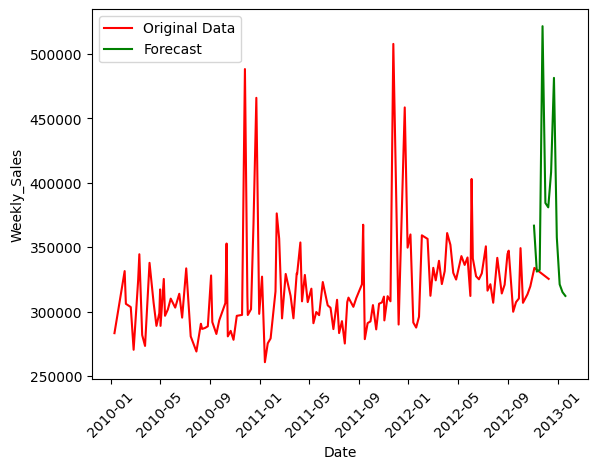

In [145]:
sns.lineplot(data=store5, x=store5.index, y='Weekly_Sales', color="red", label="Original Data")
sns.lineplot(data=forecast_s, x=forecast_s.index, y='predicted_mean', color="green", label="Forecast")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# ***Sarimax Function***

In [147]:
def Sarimax(data):
  data_log=np.log(data)
  p = d = q = range(0,2)
  pdq = list(itertools.product(p, d, q))
  seasonal_pdq= [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

  best_aic = float('inf')
  best_order = None
  best_seasonal_order = None
  for x in pdq:
    for y in seasonal_pdq:
      try:
        model_sari = SARIMAX(data_log,        # data
                      order = x,           # normal order (AR, d, MA) (1, 0, 1)
                      seasonal_order = y)  # seasonal order (AR, d, MA, periodcity) (1, 1, 1, 12)
        results_sari = model_sari.fit()                # Fitting the data into the model

        if results_sari.aic < best_aic:  # we are comparing that if the best aic is greater than the current model's aic
          best_aic = results_sari.aic    # IF yes, we will update the best aic with current model aic
          best_order = x
          best_seasonal_order = y
          print(f"SARIMA{x}x{y} - AIC: {results_sari.aic}")
      except:
        continue
print(f"Best Model: SARIMA{best_order}x{best_seasonal_order}, AIC: {best_aic}")

Best Model: SARIMA(1, 1, 1)x(1, 0, 1, 52), AIC: -366.49363596251237


# ***Store33 Forecasted Sales***

In [160]:
Sarimax(store33)

SARIMA(0, 0, 0)x(0, 0, 0, 52) - AIC: 1129.3509022358987
SARIMA(0, 0, 0)x(0, 0, 1, 52) - AIC: 1043.0656724217015
SARIMA(0, 0, 0)x(0, 1, 0, 52) - AIC: -164.31573781733863
SARIMA(0, 0, 0)x(0, 1, 1, 52) - AIC: -176.93099930452013
SARIMA(0, 0, 0)x(1, 1, 0, 52) - AIC: -176.99330169678538
SARIMA(0, 0, 1)x(0, 1, 0, 52) - AIC: -211.66644559476845
SARIMA(0, 0, 1)x(0, 1, 1, 52) - AIC: -219.1847623123701
SARIMA(0, 0, 1)x(1, 1, 0, 52) - AIC: -219.1847855429837
SARIMA(0, 1, 0)x(0, 0, 0, 52) - AIC: -262.68987523882475
SARIMA(0, 1, 0)x(0, 0, 1, 52) - AIC: -322.9019473857146
SARIMA(0, 1, 0)x(1, 0, 0, 52) - AIC: -359.25331497250596
SARIMA(0, 1, 1)x(0, 0, 1, 52) - AIC: -369.0572579236248
SARIMA(0, 1, 1)x(1, 0, 0, 52) - AIC: -402.9516079371941


In [161]:
model33=SARIMAX(store33_log,order=(0,1,1),seasonal_order=(1, 0, 0, 52))
results33=model33.fit()

In [162]:
forecast_33=results33.forecast(steps=12)
forecast_33=np.exp(forecast_33)
forecast_33

,predicted_mean
143,254622.048606
144,285479.774223
145,267769.406735
146,271822.322398
147,240464.592626
148,284128.222554
149,274951.780208
150,272027.711241
151,236293.266027
152,281301.957100


In [163]:
forecast_33 = pd.DataFrame(forecast_33).reset_index()
forecast_33 = forecast_33.rename(columns={forecast_33.columns[0]: 'Date'})
forecast_33['date'] = date_rng
forecast_33.drop(columns=['Date'],inplace=True)
forecast_33.set_index('date',inplace=True)
forecast_33

,predicted_mean
date,
2012-11-04,254622.048606
2012-11-11,285479.774223
2012-11-18,267769.406735
2012-11-25,271822.322398
2012-12-02,240464.592626
2012-12-09,284128.222554
2012-12-16,274951.780208
2012-12-23,272027.711241
2012-12-30,236293.266027


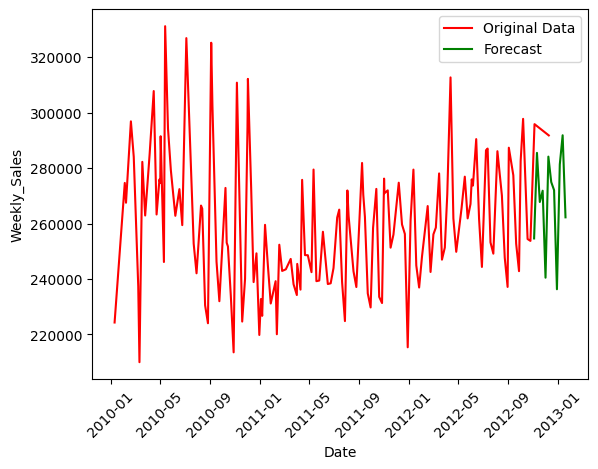

In [164]:
sns.lineplot(data=store33, x=store33.index, y='Weekly_Sales', color="red", label="Original Data")
sns.lineplot(data=forecast_33, x=forecast_33.index, y='predicted_mean', color="green", label="Forecast")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# ***Store44 Forecasted Sales***

In [165]:
Sarimax(store44)

SARIMA(0, 0, 0)x(0, 0, 0, 52) - AIC: 1132.8541550056377
SARIMA(0, 0, 0)x(0, 0, 1, 52) - AIC: 1046.2916295509503
SARIMA(0, 0, 0)x(0, 1, 0, 52) - AIC: -171.9096599406579
SARIMA(0, 0, 0)x(0, 1, 1, 52) - AIC: -183.64624704413362
SARIMA(0, 0, 0)x(1, 1, 0, 52) - AIC: -183.86035681234495
SARIMA(0, 0, 1)x(0, 1, 0, 52) - AIC: -214.00971164447222
SARIMA(0, 0, 1)x(0, 1, 1, 52) - AIC: -214.7242771054927
SARIMA(0, 0, 1)x(1, 1, 0, 52) - AIC: -214.7242855759101
SARIMA(0, 1, 0)x(0, 0, 0, 52) - AIC: -335.0050594780831
SARIMA(0, 1, 0)x(0, 0, 1, 52) - AIC: -374.7637740644679
SARIMA(0, 1, 0)x(1, 0, 0, 52) - AIC: -391.1294302085349
SARIMA(0, 1, 0)x(1, 0, 1, 52) - AIC: -393.45323525897714
SARIMA(0, 1, 1)x(0, 0, 0, 52) - AIC: -439.0601154765701
SARIMA(0, 1, 1)x(0, 0, 1, 52) - AIC: -475.49675689327626
SARIMA(0, 1, 1)x(1, 0, 0, 52) - AIC: -488.7079881314579
SARIMA(0, 1, 1)x(1, 0, 1, 52) - AIC: -490.48444141882726
SARIMA(1, 1, 1)x(1, 0, 0, 52) - AIC: -493.2697671135218
SARIMA(1, 1, 1)x(1, 0, 1, 52) - AIC: -494.

In [166]:
model44=SARIMAX(store44_log,order=(1,1,1),seasonal_order=(1, 0, 1, 52))
results44=model44.fit()

In [167]:
forecast_44=results44.forecast(steps=12)
forecast_44=np.exp(forecast_44)
forecast_44

,predicted_mean
143,334263.620165
144,346379.480934
145,345290.393981
146,353957.921134
147,323556.025323
148,339818.174772
149,343535.959787
150,410667.739882
151,303495.328508
152,354776.335389


In [168]:
forecast_44 = pd.DataFrame(forecast_44).reset_index()
forecast_44 = forecast_44.rename(columns={forecast_44.columns[0]: 'Date'})
forecast_44['date'] = date_rng
forecast_44.drop(columns=['Date'],inplace=True)
forecast_44.set_index('date',inplace=True)
forecast_44

,predicted_mean
date,
2012-11-04,334263.620165
2012-11-11,346379.480934
2012-11-18,345290.393981
2012-11-25,353957.921134
2012-12-02,323556.025323
2012-12-09,339818.174772
2012-12-16,343535.959787
2012-12-23,410667.739882
2012-12-30,303495.328508


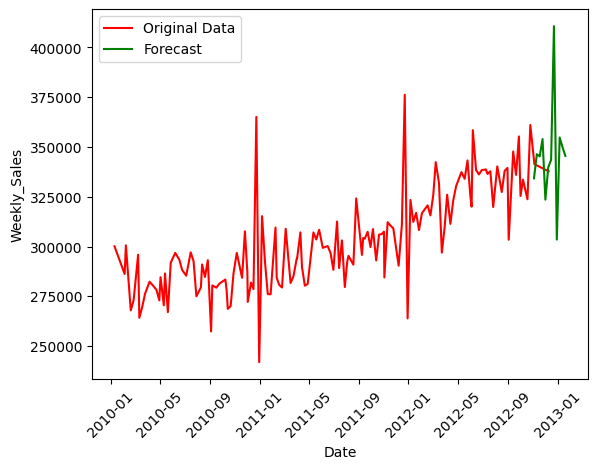

In [169]:
sns.lineplot(data=store44, x=store44.index, y='Weekly_Sales', color="red", label="Original Data")
sns.lineplot(data=forecast_44, x=forecast_44.index, y='predicted_mean', color="green", label="Forecast")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# ***Store4 Forecasted Sales***

In [170]:
Sarimax(store4)

SARIMA(0, 0, 0)x(0, 0, 0, 52) - AIC: 1173.5821463450875
SARIMA(0, 0, 0)x(0, 0, 1, 52) - AIC: 1086.7379250858855
SARIMA(0, 0, 0)x(0, 1, 0, 52) - AIC: -200.3662194792
SARIMA(0, 0, 0)x(0, 1, 1, 52) - AIC: -211.64926337757566
SARIMA(0, 0, 0)x(1, 1, 0, 52) - AIC: -211.74552567463334
SARIMA(0, 0, 1)x(0, 1, 0, 52) - AIC: -233.9444646893299
SARIMA(0, 0, 1)x(0, 1, 1, 52) - AIC: -236.04185518083023
SARIMA(0, 1, 0)x(0, 0, 1, 52) - AIC: -286.0499973782597
SARIMA(0, 1, 0)x(1, 0, 0, 52) - AIC: -337.04654729837165
SARIMA(0, 1, 1)x(1, 0, 0, 52) - AIC: -399.57448003131424
SARIMA(0, 1, 1)x(1, 0, 1, 52) - AIC: -400.28429363907105


In [171]:
model4=SARIMAX(store4_log,order=(1,1,1),seasonal_order=(1, 0, 1, 52))
results4=model4.fit()

In [172]:
forecast_4=results4.forecast(steps=12)
forecast_4=np.exp(forecast_4)
forecast_4

,predicted_mean
143,2.295903e+06
144,2.238540e+06
145,2.295117e+06
146,3.022469e+06
147,2.251436e+06
148,2.539650e+06
149,2.844347e+06
150,3.690831e+06
151,2.041455e+06
152,2.089631e+06


In [173]:
forecast_4 = pd.DataFrame(forecast_4).reset_index()
forecast_4 = forecast_4.rename(columns={forecast_4.columns[0]: 'Date'})
forecast_4['date'] = date_rng
forecast_4.drop(columns=['Date'],inplace=True)
forecast_4.set_index('date',inplace=True)
forecast_4

,predicted_mean
date,
2012-11-04,2.295903e+06
2012-11-11,2.238540e+06
2012-11-18,2.295117e+06
2012-11-25,3.022469e+06
2012-12-02,2.251436e+06
2012-12-09,2.539650e+06
2012-12-16,2.844347e+06
2012-12-23,3.690831e+06
2012-12-30,2.041455e+06


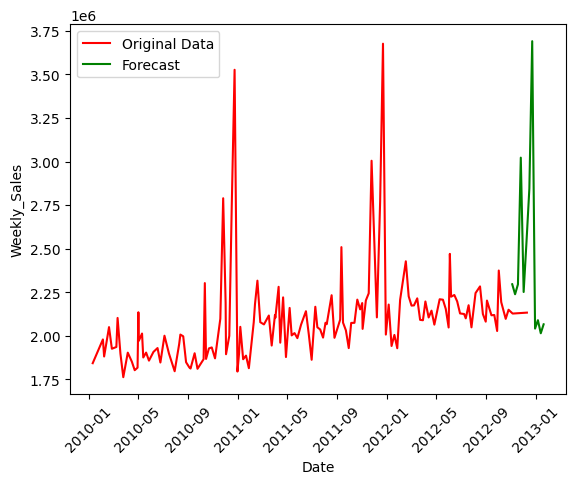

In [174]:
sns.lineplot(data=store4, x=store4.index, y='Weekly_Sales', color="red", label="Original Data")
sns.lineplot(data=forecast_4, x=forecast_4.index, y='predicted_mean', color="green", label="Forecast")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# ***Store20 Forecasted Sales***

In [148]:
Sarimax(store20)

SARIMA(0, 0, 0)x(0, 0, 0, 52) - AIC: 1173.6969305102061
SARIMA(0, 0, 0)x(0, 0, 1, 52) - AIC: 1087.001076661425
SARIMA(0, 0, 0)x(0, 1, 0, 52) - AIC: -234.17184907927376
SARIMA(0, 0, 0)x(0, 1, 1, 52) - AIC: -237.38735795630487
SARIMA(0, 0, 0)x(1, 1, 0, 52) - AIC: -237.38736234895572
SARIMA(0, 0, 1)x(0, 1, 1, 52) - AIC: -238.16168484376755
SARIMA(0, 0, 1)x(1, 1, 0, 52) - AIC: -238.16168649984087
SARIMA(0, 1, 0)x(0, 0, 1, 52) - AIC: -239.90729794497722
SARIMA(0, 1, 0)x(1, 0, 0, 52) - AIC: -259.1634881468901
SARIMA(0, 1, 1)x(0, 0, 1, 52) - AIC: -266.9603462836154
SARIMA(0, 1, 1)x(1, 0, 0, 52) - AIC: -305.89058332219656
SARIMA(0, 1, 1)x(1, 0, 1, 52) - AIC: -311.4696511888361
SARIMA(1, 1, 1)x(1, 0, 0, 52) - AIC: -313.9667578012068
SARIMA(1, 1, 1)x(1, 0, 1, 52) - AIC: -315.1450083510018


In [155]:
model20=SARIMAX(store20_log,order=(1,1,1),seasonal_order=(1, 0, 1, 52))
results20=model20.fit()

In [156]:
forecast_20=results20.forecast(steps=12)
forecast_20=np.exp(forecast_20)
forecast_20

,predicted_mean
143,2.281995e+06
144,2.279929e+06
145,2.194642e+06
146,2.859443e+06
147,2.383777e+06
148,2.643569e+06
149,2.786261e+06
150,3.553976e+06
151,2.003961e+06
152,1.980228e+06


In [157]:
forecast_20 = pd.DataFrame(forecast_20).reset_index()
forecast_20 = forecast_20.rename(columns={forecast_20.columns[0]: 'Date'})
forecast_20['date'] = date_rng
forecast_20.drop(columns=['Date'],inplace=True)
forecast_20.set_index('date',inplace=True)
forecast_20

,predicted_mean
date,
2012-11-04,2.281995e+06
2012-11-11,2.279929e+06
2012-11-18,2.194642e+06
2012-11-25,2.859443e+06
2012-12-02,2.383777e+06
2012-12-09,2.643569e+06
2012-12-16,2.786261e+06
2012-12-23,3.553976e+06
2012-12-30,2.003961e+06


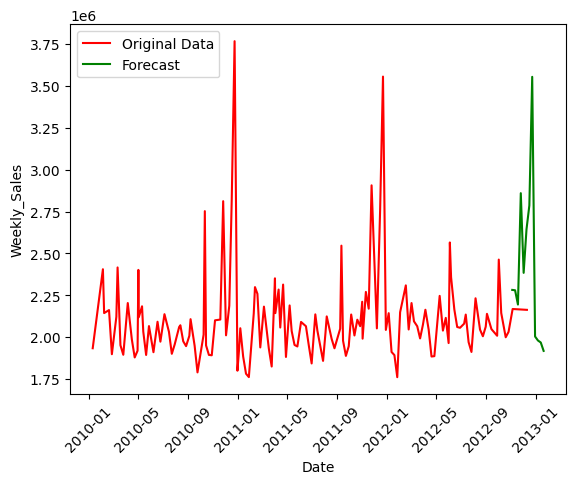

In [158]:
sns.lineplot(data=store20, x=store20.index, y='Weekly_Sales', color="red", label="Original Data")
sns.lineplot(data=forecast_20, x=forecast_20.index, y='predicted_mean', color="green", label="Forecast")
plt.legend()
plt.xticks(rotation=45)
plt.show()